In [4]:
!pip install textblob

In [93]:
import pandas as pd 
import numpy as np 

import nltk
import re
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn 
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Performing EDA

**Importing dataset**

In [6]:
data = pd.read_csv('movie.csv')
print ("The shape of the  data is (row, column):"+ str(data.shape))
print (data.info())

The shape of the  data is (row, column):(40000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB
None


In [7]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [85]:
data.describe

<bound method NDFrame.describe of                                                     text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      Im a die hard Dads Army fan and nothing will e...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[40000 rows x 2 columns]>

## Data Preprocessing 

**checking for null values**

In [9]:
df=data.copy()
df.isnull().sum()

text     0
label    0
dtype: int64

no null values found

**checking for duplicate values**

In [10]:
df.duplicated().sum()

277

277 total duplicate values

**dropping duplicate values**

In [94]:
df.drop_duplicates(inplace = True) #inplace = True to modify the same dataset rather than creating a new

**Text Cleaning**

Making a copy of the previously copied dataset

In [98]:
ds=df.copy() 

**Making text lowercase, remove text in square brackets,remove links,remove punctuation
and remove words containing numbers.**

In [15]:
def text_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [17]:
ds['text']=ds['text'].apply(lambda x:text_cleaning(x))
ds.head()

,text,label
0,i grew up b watching and loving the thunderbi...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


**a list of all the stopword**

In [18]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

we could also have used nltk.corpus library for the same purpose but due to some reason it was not working properly, therefore I had to do this thing manually

In [19]:
ds['text'] = ds['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
ds.head()

,text,label
0,grew b watching loving thunderbirds mates scho...,0
1,put movie dvd player sat down coke chips expec...,0
2,people not know particular time past like feel...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing will ever ch...,1


**creating two new features**

In [20]:
ds['text_len'] = ds['text'].astype(str).apply(len)
ds['word_count'] = ds['text'].apply(lambda x: len(str(x).split()))

In [21]:
ds.head()

,text,label,text_len,word_count
0,grew b watching loving thunderbirds mates scho...,0,624,89
1,put movie dvd player sat down coke chips expec...,0,1176,171
2,people not know particular time past like feel...,0,639,100
3,even though great interest biblical movies bor...,0,219,35
4,im die hard dads army fan nothing will ever ch...,1,673,104


to operate plotly in offline mode

In [22]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

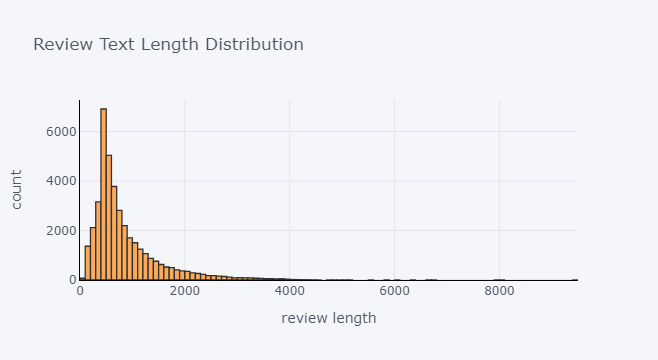

In [24]:
ds['text_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

**We have a right skewed distribution**

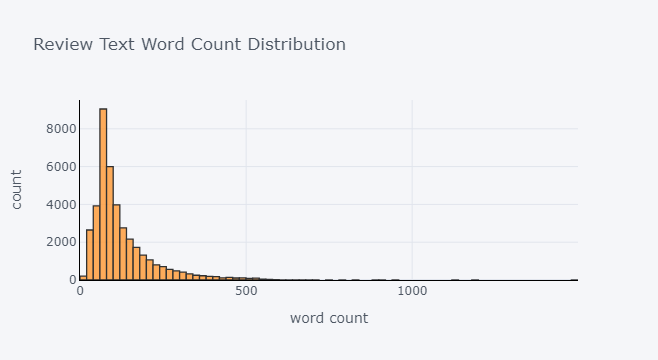

In [25]:
ds['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

**We have a right skewed distribution** 

I sought assistance from some Kaggle notebooks that I went through while learning

**Stemming and tokenizing**

making a copy of the dataset we used previously

In [28]:
ds_=ds.copy()
ds_=ds_[['text']].reset_index(drop=True)
ds_.head()

,text
0,grew b watching loving thunderbirds mates scho...
1,put movie dvd player sat down coke chips expec...
2,people not know particular time past like feel...
3,even though great interest biblical movies bor...
4,im die hard dads army fan nothing will ever ch...


In [29]:
ps = PorterStemmer()

corpus = []
for i in range(0, len(ds_)):
    review = re.sub('[^a-zA-Z]', ' ', ds_['text'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)    

In [99]:
corpus[3]

'even though great interest biblic movi bore death everi minut movi everyth bad movi long act time joke script horribl not get point mix stori abraham noah togeth if valu time saniti stay away horror'

## Feature Extraction

**Here I did splitting as bigram (two words) and considered their combined weight.Also I took only the top 5000 words from the reviews.**

**Creating Embeddings**

In [31]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
X= tfidf_vectorizer.fit_transform(ds_['text'])

we could a have also used other embedding such as OHE, BOW, Word2Vec etc.
Word2vec was generating some error whose reason I couldn't figure out so I had to go  with Tf-Idf

In [36]:
X.shape

(39723, 5000)

In [37]:
ds_.head()

,text
0,grew b watching loving thunderbirds mates scho...
1,put movie dvd player sat down coke chips expec...
2,people not know particular time past like feel...
3,even though great interest biblical movies bor...
4,im die hard dads army fan nothing will ever ch...


Defining our target vector

In [38]:
y=ds['label']

**Doing a train test split of 80:20**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model selection and Evaluation

In [66]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

In [88]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))
print("ROC-AUC Score:{:.4f}".format(roc_auc_score(y_test, y_pred)))
print("f1 score Score:{:.4f}".format(f1_score(y_test, y_pred)))
c = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", c)

Accuracy of logistic regression classifier on test set: 0.8193
ROC-AUC Score:0.8198
f1 score Score:0.8187
Confusion Matrix: 
 [[3266  818]
 [ 618 3243]]


In [89]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('Accuracy of random forest regression classifier on test set: {:.4f}'.format(rf.score(X_test, y_test)))
print("ROC-AUC Score:{:.4f}".format(roc_auc_score(y_test, y_pred)))
print("f1 score Score:{:.4f}".format(f1_score(y_test, y_pred)))
c = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", c)

Accuracy of random forest regression classifier on test set: 0.7787
ROC-AUC Score:0.7781
f1 score Score:0.7683
Confusion Matrix: 
 [[3272  812]
 [ 946 2915]]


In [90]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print('Accuracy of Bernoulli Naive Bayes Classifier on test set: {:.4f}'.format(bnb.score(X_test, y_test)))
print("ROC-AUC Score:{:.4f}".format(roc_auc_score(y_test, y_pred)))
print("f1 score Score:{:.4f}".format(f1_score(y_test, y_pred)))
c = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", c)

Accuracy of Bernoulli Naive Bayes Classifier on test set: 0.8077
ROC-AUC Score:0.8094
f1 score Score:0.8150
Confusion Matrix: 
 [[3052 1032]
 [ 496 3365]]


In [91]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(svm.score(X_test, y_test)))
print("ROC-AUC Score:{:.4f}".format(roc_auc_score(y_test, y_pred)))
print("f1 score Score:{:.4f}".format(f1_score(y_test, y_pred)))
c = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", c)

Accuracy of support vector machine on test set: 0.8138
ROC-AUC Score:0.8143
f1 score Score:0.8126
Confusion Matrix: 
 [[3260  824]
 [ 655 3206]]


In [97]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=5, activation='relu', solver='adam')
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)
print('Accuracy of support vector machine on test set: {:.4f}'.format(MLP.score(X_test, y_test)))
print("ROC-AUC Score:{:.4f}".format(roc_auc_score(y_test, y_pred)))
print("f1 score Score:{:.4f}".format(f1_score(y_test, y_pred)))
c = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", c)

Accuracy of support vector machine on test set: 0.8029
ROC-AUC Score:0.8033
f1 score Score:0.8011
Confusion Matrix: 
 [[3225  859]
 [ 707 3154]]


Among them logistic regressionn has performed a bit better we have to hyperparameter tuning to get better results.

In [83]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      4084
           1       0.80      0.80      0.80      3861

    accuracy                           0.81      7945
   macro avg       0.81      0.81      0.81      7945
weighted avg       0.81      0.81      0.81      7945



The References I have used in making this code:
1. [CampusX](www.youtube.com/@campusx-official)
2. [Krish Naik](www.youtube.com/@krishnaik06)
3. [Some Kaggle Notebooks](https://www.kaggle.com/)